# Import the necessary libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib as mlb # data visulaization er jnno
import matplotlib.pyplot as plt
import seaborn as sns #statistical visualization er jnno kaje lage

In [26]:
stock_data=pd.read_csv('Stock_Market_Data.csv')
stock_data.head()

,Date,Name,Open,High,Low,Close,Volume
0,02-01-2022,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,03-01-2022,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,04-01-2022,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,05-01-2022,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,06-01-2022,01.Bank,23.12,23.65,23.00,23.37,2586344.19


# Loading the dataset with pandas

In [27]:
# Read the CSV file
stock_data = pd.read_csv('Stock_Market_Data.csv')
# 1st 5 rows of dataset
stock_data.head()

,Date,Name,Open,High,Low,Close,Volume
0,02-01-2022,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,03-01-2022,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,04-01-2022,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,05-01-2022,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,06-01-2022,01.Bank,23.12,23.65,23.00,23.37,2586344.19


# Exploratory Data Analysis (EDA)

In [28]:
print(stock_data.shape)

# Check the data types
stock_data.dtypes


(49158, 7)


Date       object
Name       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [29]:
# Convert 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'], dayfirst = True)

In [30]:
stock_data.dtypes

Date      datetime64[ns]
Name              object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

# Part 1: Data Cleaning and Exploration:

# Calculate basic summary statistics for each column (mean, median, standard deviation, etc.

In [31]:
stock_data.describe()

,Date,Open,High,Low,Close,Volume
count,49158,49158.000000,49158.000000,49158.000000,49158.000000,4.915800e+04
mean,2022-03-31 12:56:37.436836608,157.869018,159.588214,155.906364,157.351462,5.619999e+05
min,2022-01-02 00:00:00,3.900000,3.900000,3.000000,3.800000,1.000000e+00
25%,2022-02-13 00:00:00,19.000000,19.300000,18.700000,19.000000,5.109475e+04
50%,2022-03-30 00:00:00,40.300000,41.000000,39.535000,40.100000,1.824160e+05
75%,2022-05-19 00:00:00,89.400000,90.500000,87.700000,88.700000,5.401398e+05
max,2022-06-30 00:00:00,6000.000000,6050.000000,5975.000000,6000.500000,6.593180e+07
std,NaN,520.191624,523.348078,517.136149,519.711667,1.276909e+06


#     Get the top 5 companies with the highest total volume:


In [32]:
# Calculate total volume for each company
volume_per_company = stock_data.groupby('Name')['Volume'].sum()

# Get the top 5 companies with the highest total volume
top_5_companies = volume_per_company.nlargest(5).index
top_5_companies.to_list()


['UNIONBANK', 'KEYACOSMET', 'BEXIMCO', 'FUWANGFOOD', 'IFIC']

#     Explore the distribution of the 'Close' prices over time.


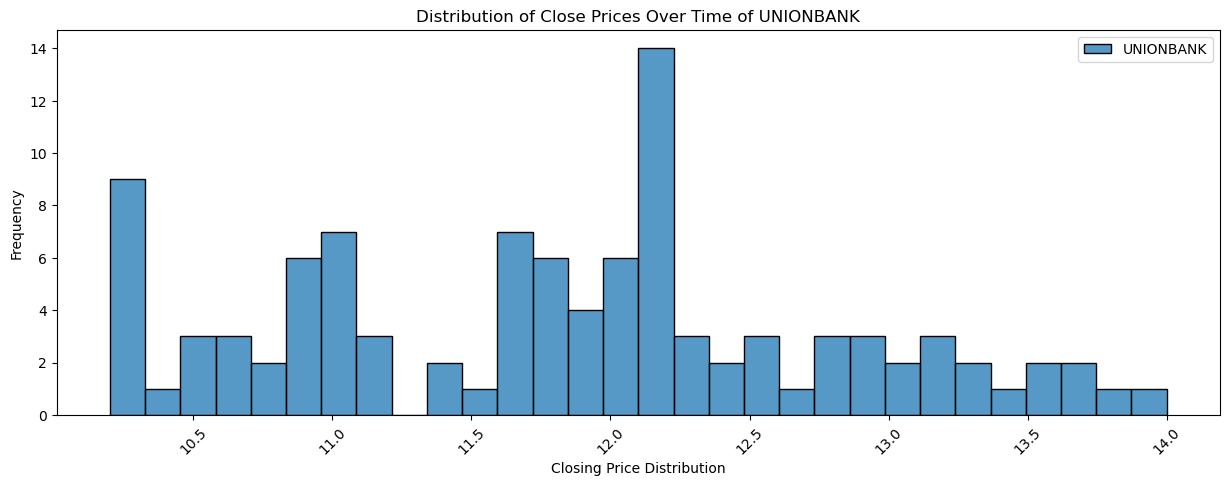

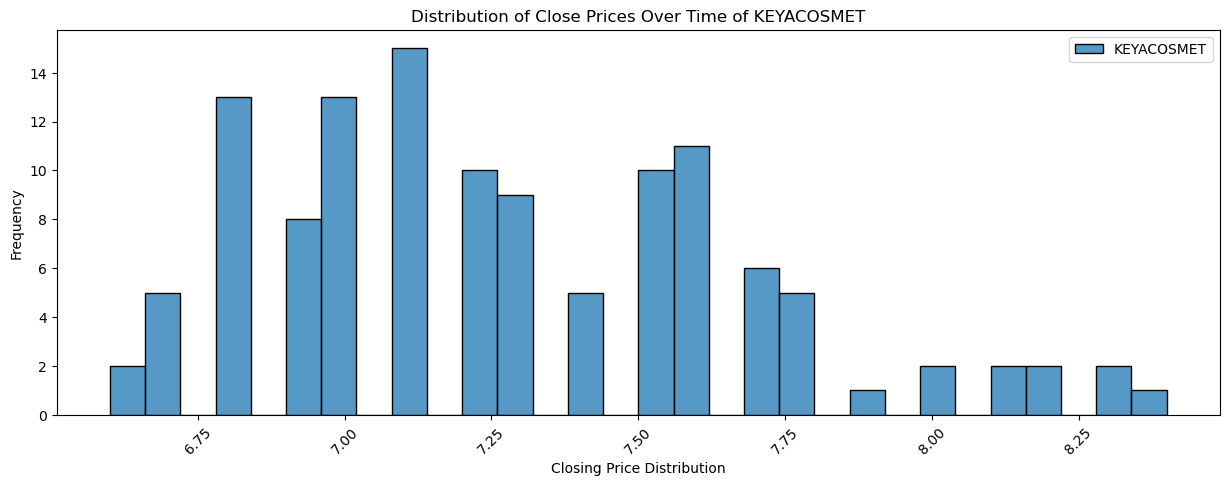

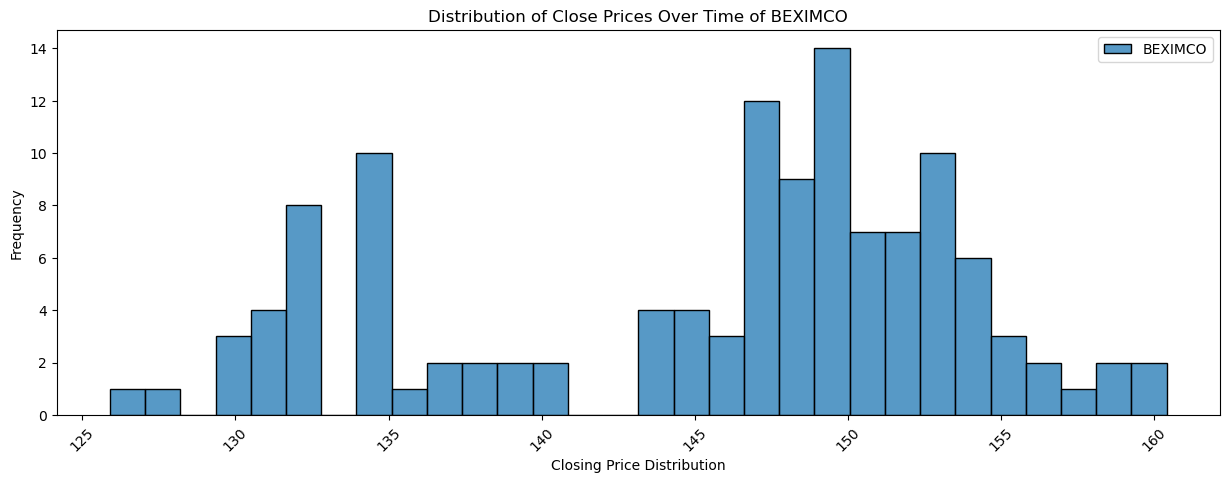

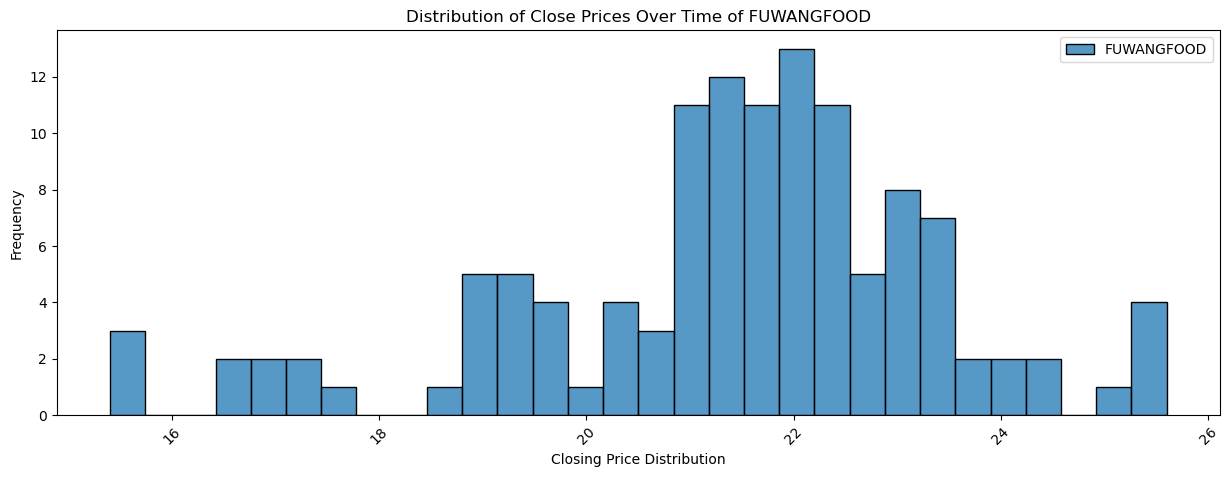

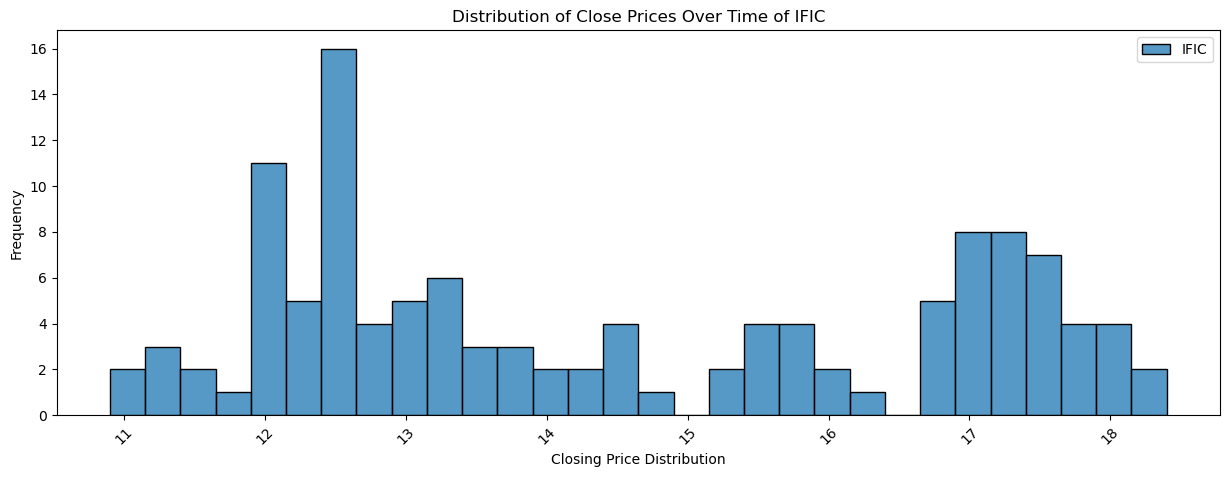

In [33]:
for name in top_5_companies:
    # Filter data for the current company
    company_data = stock_data[stock_data['Name'] == name]

    plt.figure(figsize = (15, 5))
    # Histogram for 'Close' prices over time for the current company
    sns.histplot(data = company_data, x = 'Close', bins = 30, label = name)

    # Set labels and title
    plt.xlabel('Closing Price Distribution')
    plt.ylabel('Frequency')
    plt.title('Distribution of Close Prices Over Time of {}'.format(name))

    # Add legend, rotate x-axis labels, and show the plot
    plt.legend()
    plt.xticks(rotation = 45)
    plt.show()


# Identify and analyze any outliers (if any) in the dataset.

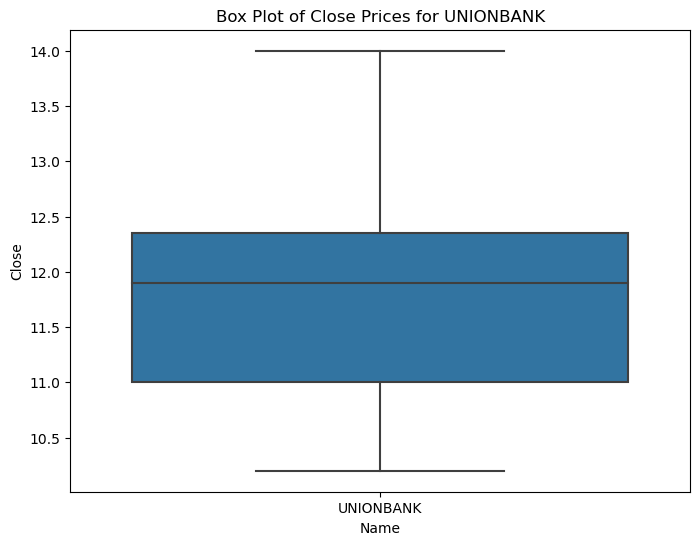


Company: UNIONBANK
Number of outliers: 0
Outliers:
Empty DataFrame
Columns: [Date, Close]
Index: []


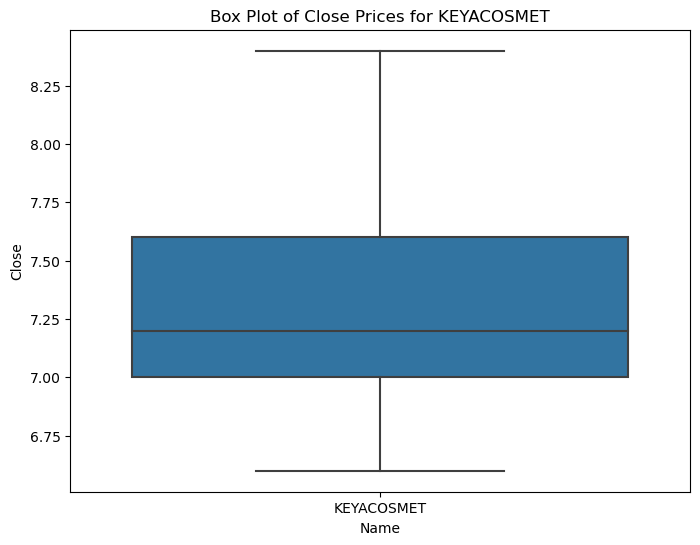


Company: KEYACOSMET
Number of outliers: 0
Outliers:
Empty DataFrame
Columns: [Date, Close]
Index: []


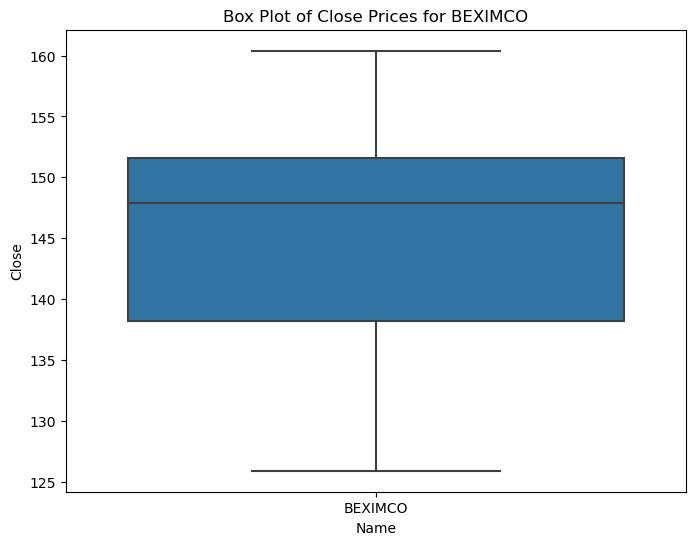


Company: BEXIMCO
Number of outliers: 0
Outliers:
Empty DataFrame
Columns: [Date, Close]
Index: []


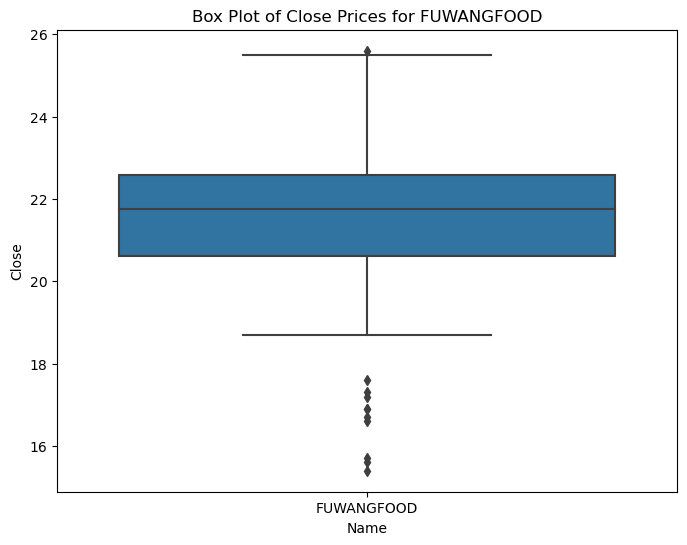


Company: FUWANGFOOD
Number of outliers: 11
Outliers:
            Date  Close
3387  2022-01-02   15.4
3388  2022-01-03   15.6
3389  2022-01-04   15.7
3390  2022-01-05   17.2
3391  2022-01-06   16.6
3392  2022-01-09   16.7
3393  2022-01-10   16.9
3394  2022-01-11   16.9
3395  2022-01-12   17.3
3396  2022-01-13   17.6
43687 2022-06-28   25.6


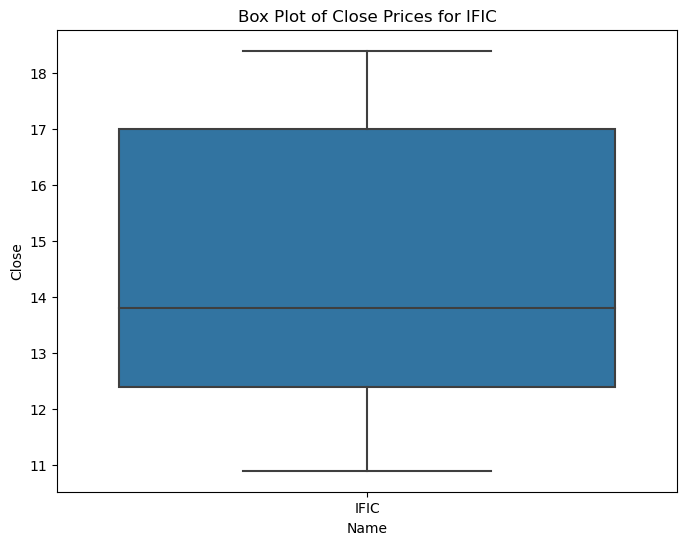


Company: IFIC
Number of outliers: 0
Outliers:
Empty DataFrame
Columns: [Date, Close]
Index: []


In [34]:
for name in top_5_companies:
    # Filter data for the current company
    company_data = stock_data[stock_data['Name'] == name]

    # Box plot to visualize outliers in 'Close' prices for the current company
    plt.figure(figsize = (8, 6))
    sns.boxplot(x = 'Name', y = 'Close', data = company_data)
    plt.title(f'Box Plot of Close Prices for {name}')
    plt.show()

    # Calculate the Interquartile Range (IQR) for the current company
    Q1 = company_data['Close'].quantile(0.25)
    Q3 = company_data['Close'].quantile(0.75)
    IQR = Q3 - Q1

    # Define a threshold for identifying outliers for the current company
    threshold = 1.5 * IQR

    # Identify and analyze outliers for the current company
    outliers = company_data[(company_data['Close'] < Q1 - threshold) | (company_data['Close'] > Q3 + threshold)]

    # Print information about outliers for the current company
    print(f"\nCompany: {name}")
    print("Number of outliers:", len(outliers))
    print("Outliers:")
    print(outliers[['Date', 'Close']])


# Part 2: Time Series Analysis / Rolling Window / Moving Averages :

# Create a line chart to visualize the 'Close' prices over time.

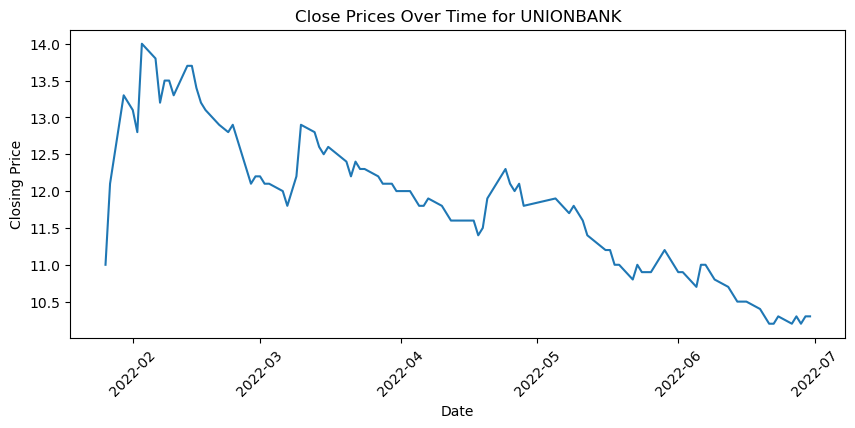

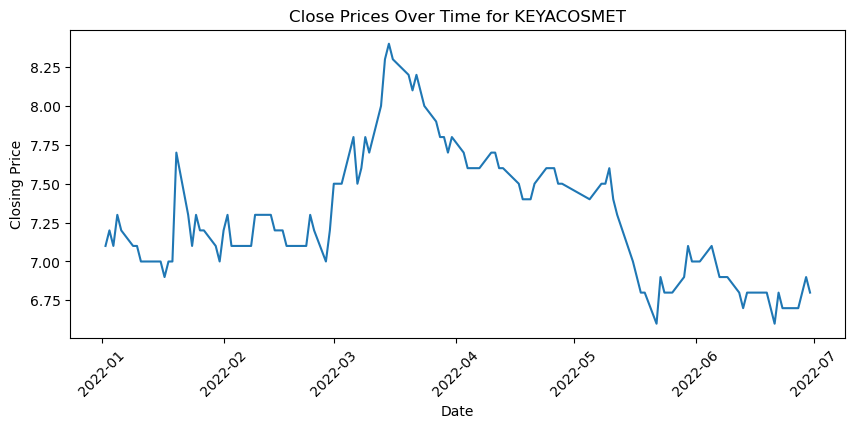

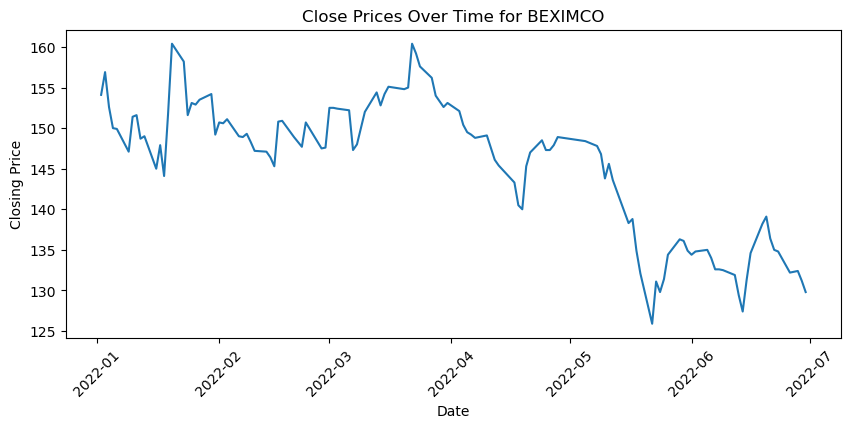

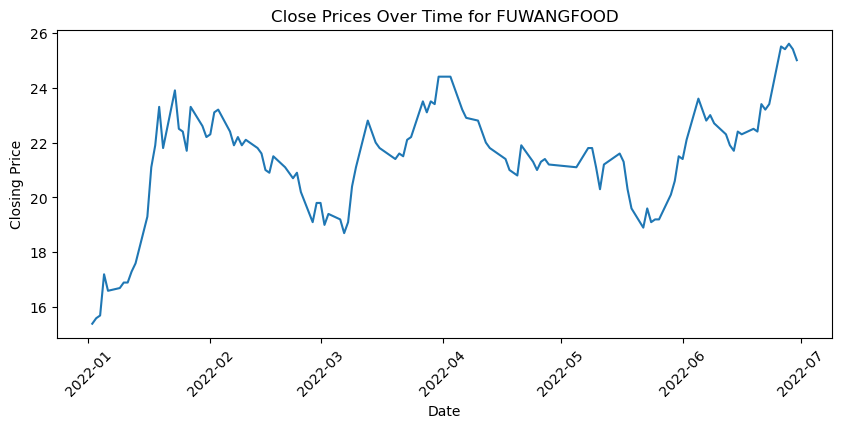

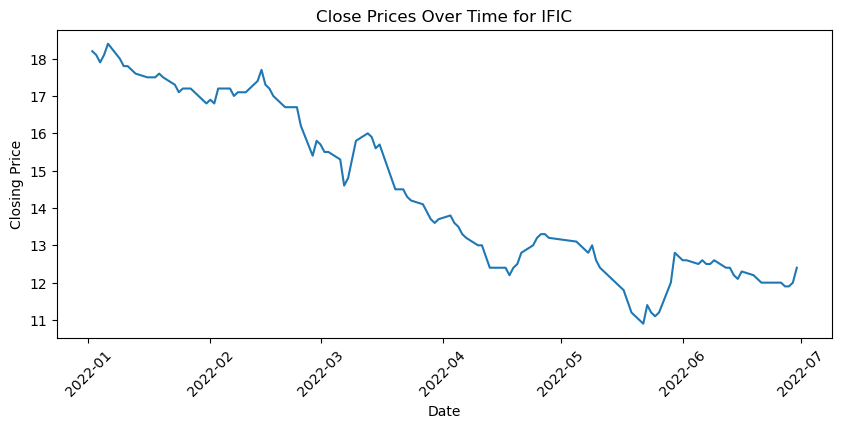

In [35]:
for name in top_5_companies:
    # Filter data for each specific company
    company_data = stock_data[stock_data['Name'] == name]

    # Create a separate line chart for each company's 'Close' prices over time
    plt.figure(figsize=(10, 4))
    plt.plot(company_data['Date'], company_data['Close'])

    # Set labels and title for the plot
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title(f'Close Prices Over Time for {name}')
    plt.xticks(rotation = 45)

    # Show the plot for each company
    plt.show()


# Calculate and plot the daily percentage change in closing prices.

C:\Users\HP\AppData\Local\Temp\ipykernel_9948\3937819945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Daily_PCT_Change'] = company_data['Close'].pct_change()


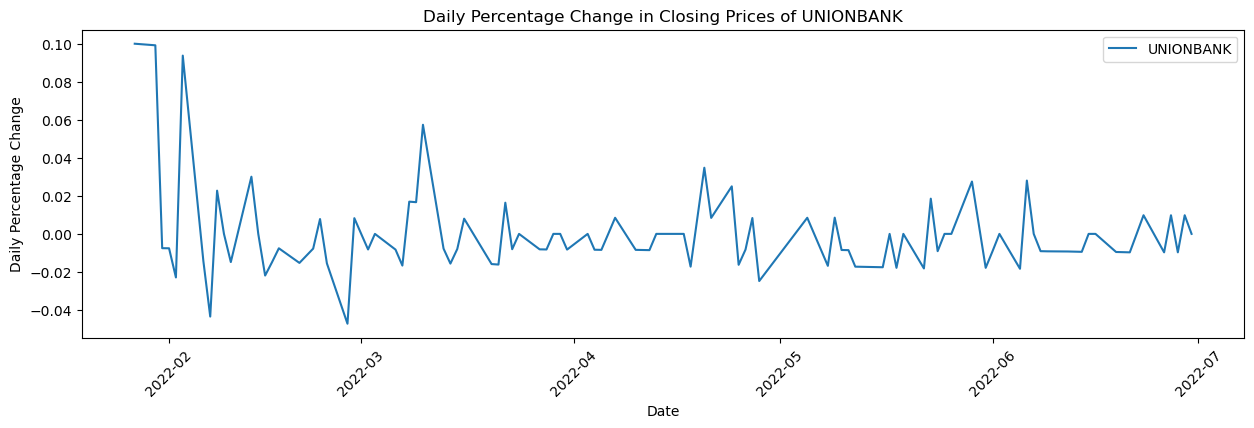

C:\Users\HP\AppData\Local\Temp\ipykernel_9948\3937819945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Daily_PCT_Change'] = company_data['Close'].pct_change()


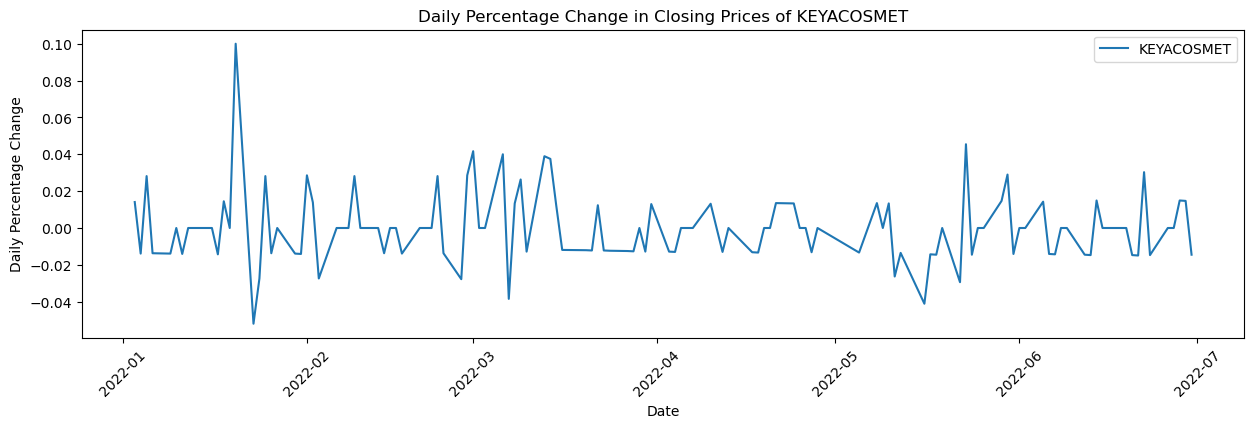

C:\Users\HP\AppData\Local\Temp\ipykernel_9948\3937819945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Daily_PCT_Change'] = company_data['Close'].pct_change()


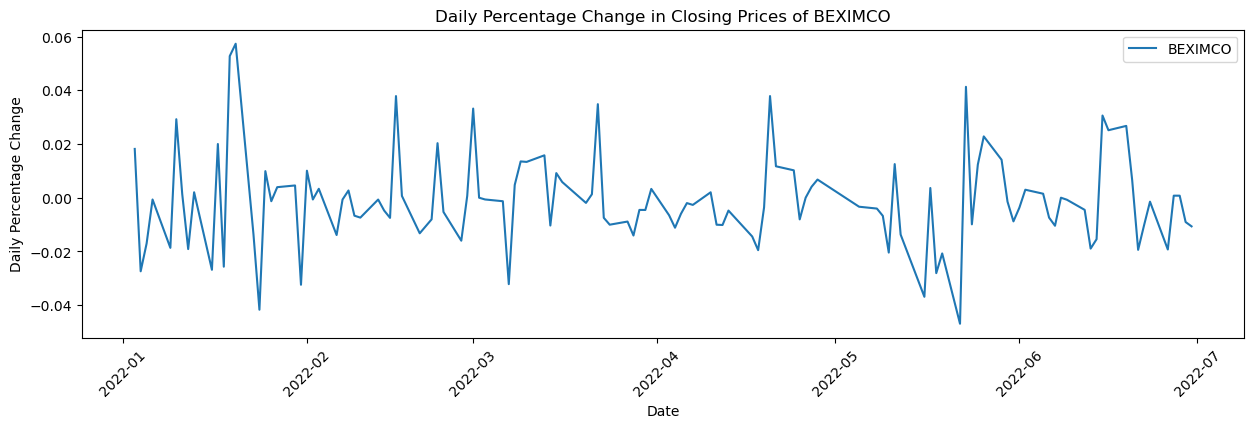

C:\Users\HP\AppData\Local\Temp\ipykernel_9948\3937819945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Daily_PCT_Change'] = company_data['Close'].pct_change()


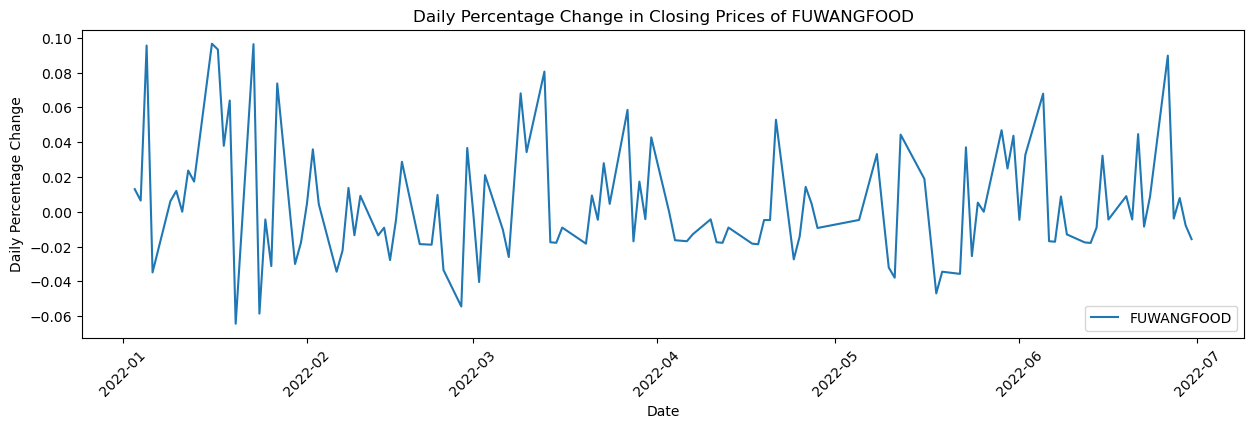

C:\Users\HP\AppData\Local\Temp\ipykernel_9948\3937819945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Daily_PCT_Change'] = company_data['Close'].pct_change()


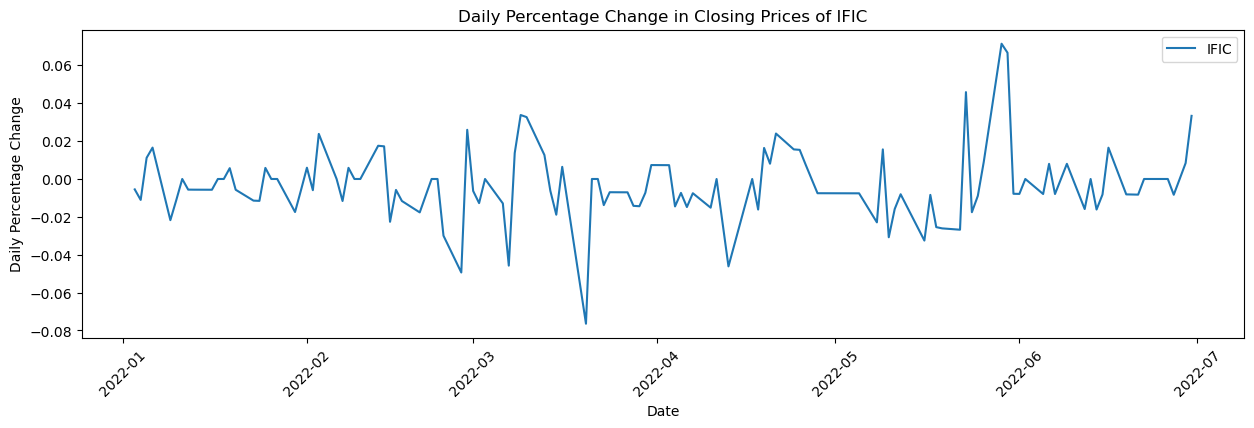

In [36]:
# Calculate daily percentage change for each company and plot individually
for name in top_5_companies:
    plt.figure(figsize=(15, 4))
    company_data = stock_data[stock_data['Name'] == name]
    company_data['Daily_PCT_Change'] = company_data['Close'].pct_change()

    # Plot the daily percentage change for each company
    plt.plot(company_data['Date'], company_data['Daily_PCT_Change'], label = name)

    # Set labels and title for the plot
    plt.xlabel('Date')
    plt.ylabel('Daily Percentage Change')
    plt.title(f'Daily Percentage Change in Closing Prices of {name}')
    plt.legend()
    plt.xticks(rotation = 45)
    plt.show()


#     Investigate the presence of any trends or seasonality in the stock prices.


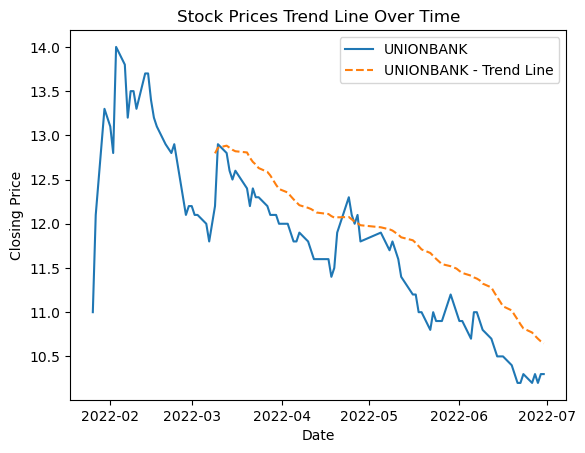

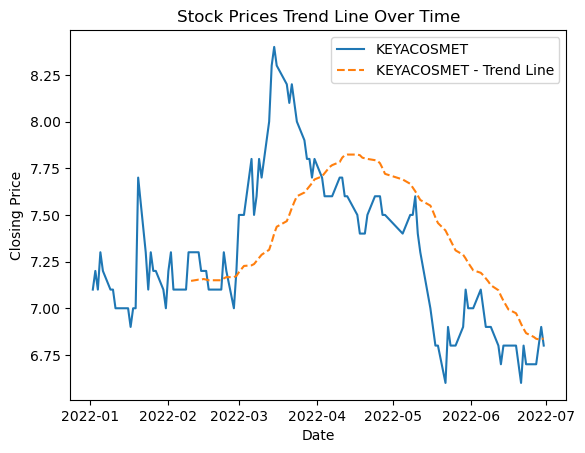

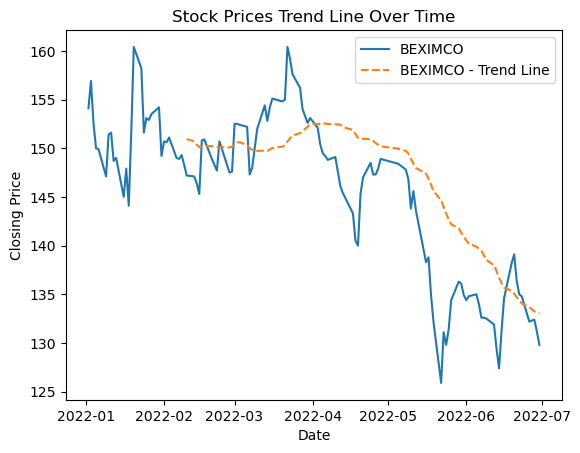

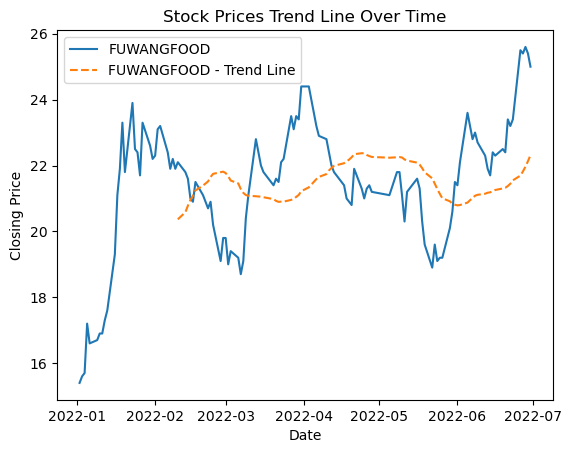

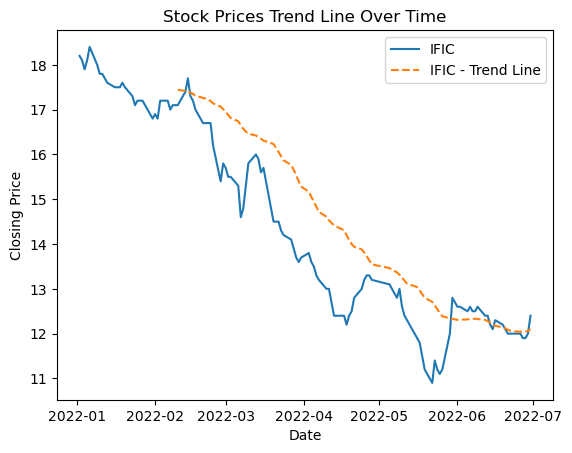

In [37]:
for name in top_5_companies:
    company_data = stock_data[stock_data['Name'] == name]
    plt.plot(company_data['Date'],company_data['Close'], label = name)

    # Plotting a rolling average (e.g., 30 days) for trend visualizations
    rolling_avg = company_data['Close'].rolling(window = 30).mean()
    plt.plot(company_data['Date'], rolling_avg, label = f'{name} - Trend Line', linestyle='--')

    # Set labels and title for the plot
    plt.title('Stock Prices Trend Line Over Time')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()


# Apply moving averages to smooth the time series data in 15/30 day intervals against the original graph.

C:\Users\HP\AppData\Local\Temp\ipykernel_9948\2034013294.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['15_Day_MA'] = company_data['Close'].rolling(window = 15).mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_9948\2034013294.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['30_Day_MA'] = company_data['Close'].rolling(window = 30).mean()


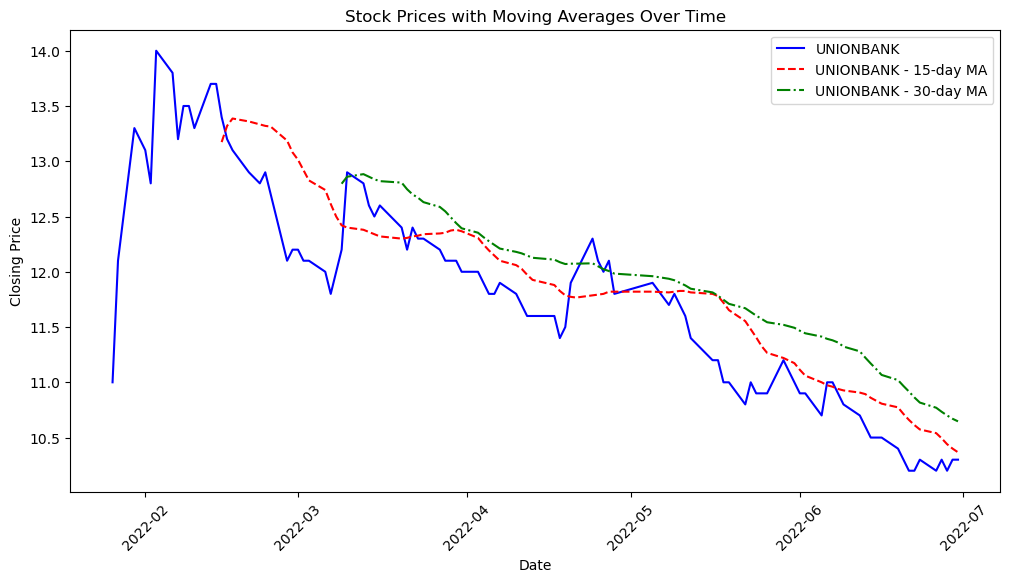

C:\Users\HP\AppData\Local\Temp\ipykernel_9948\2034013294.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['15_Day_MA'] = company_data['Close'].rolling(window = 15).mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_9948\2034013294.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['30_Day_MA'] = company_data['Close'].rolling(window = 30).mean()


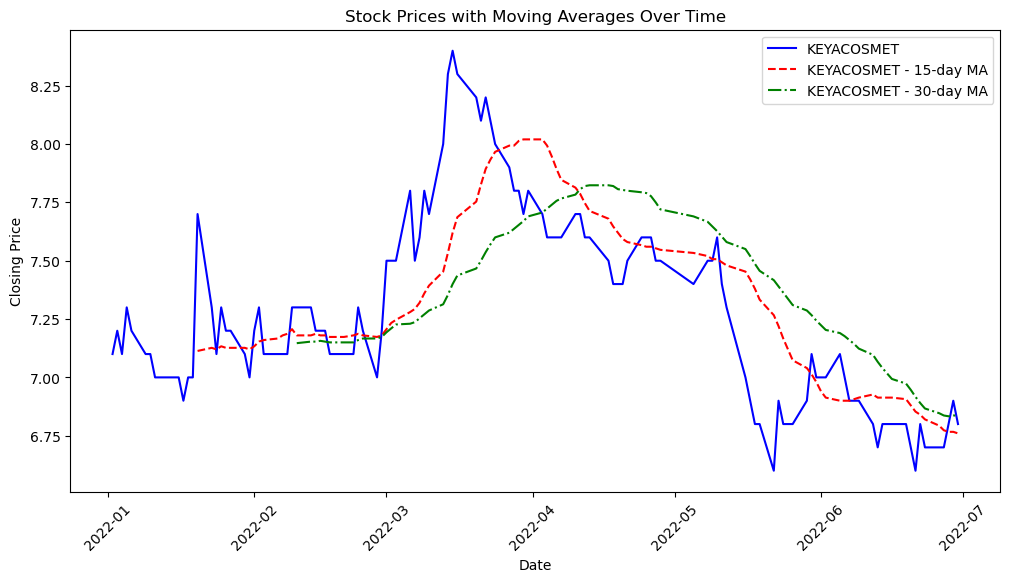

C:\Users\HP\AppData\Local\Temp\ipykernel_9948\2034013294.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['15_Day_MA'] = company_data['Close'].rolling(window = 15).mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_9948\2034013294.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['30_Day_MA'] = company_data['Close'].rolling(window = 30).mean()


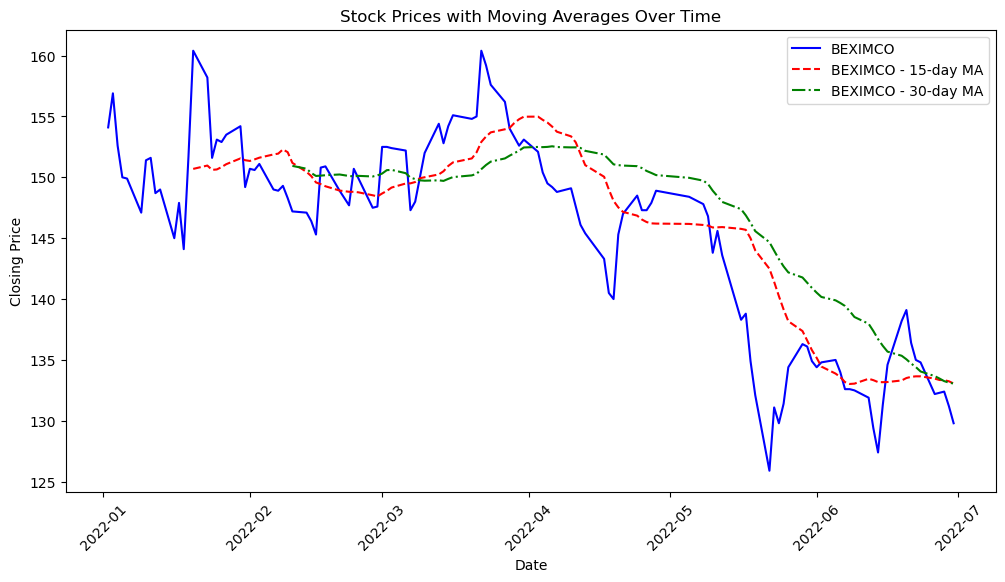

C:\Users\HP\AppData\Local\Temp\ipykernel_9948\2034013294.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['15_Day_MA'] = company_data['Close'].rolling(window = 15).mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_9948\2034013294.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['30_Day_MA'] = company_data['Close'].rolling(window = 30).mean()


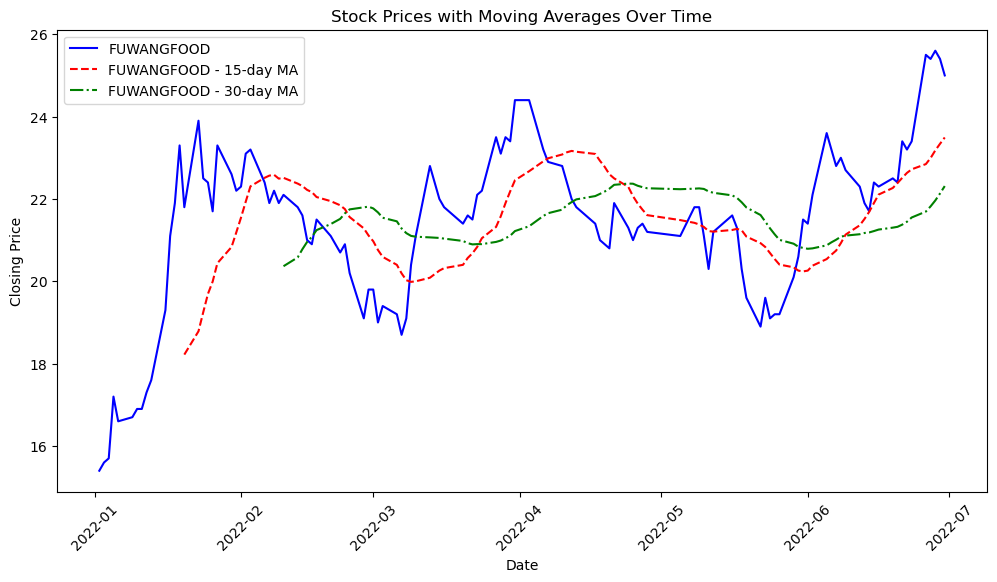

C:\Users\HP\AppData\Local\Temp\ipykernel_9948\2034013294.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['15_Day_MA'] = company_data['Close'].rolling(window = 15).mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_9948\2034013294.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['30_Day_MA'] = company_data['Close'].rolling(window = 30).mean()


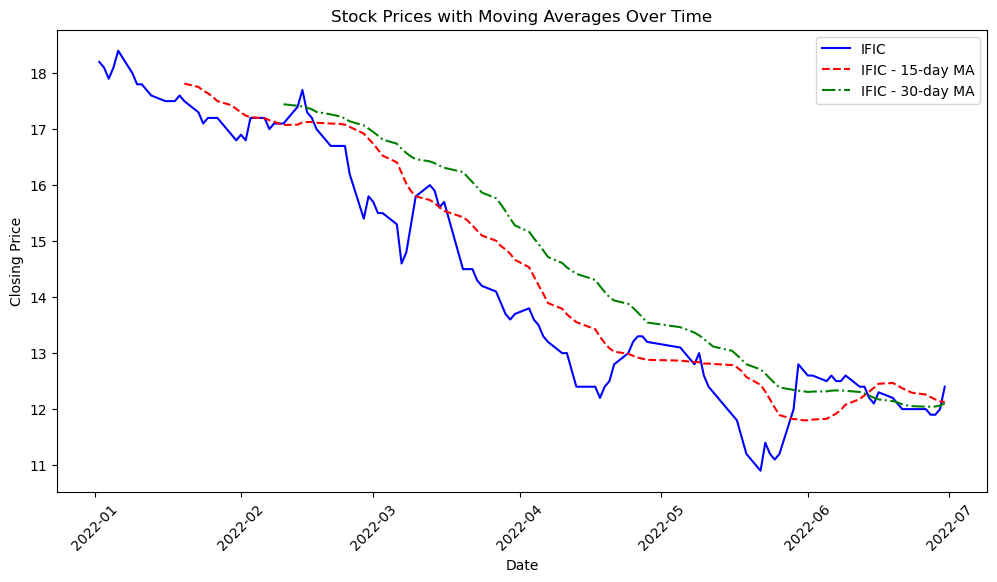

In [38]:
for name in top_5_companies:
    plt.figure(figsize=(12, 6))
    company_data = stock_data[stock_data['Name'] == name]

    # Plotting original closing prices
    plt.plot(company_data['Date'], company_data['Close'], label = name, color = 'blue')

    # Calculate and plot moving averages (15-day and 30-day)
    company_data['15_Day_MA'] = company_data['Close'].rolling(window = 15).mean()
    company_data['30_Day_MA'] = company_data['Close'].rolling(window = 30).mean()

    plt.plot(company_data['Date'], company_data['15_Day_MA'], label = f'{name} - 15-day MA', linestyle='--', color = 'red')
    plt.plot(company_data['Date'], company_data['30_Day_MA'], label = f'{name} - 30-day MA', linestyle='-.', color = 'green')

    # Set labels, title, and legend
    plt.title('Stock Prices with Moving Averages Over Time')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()


# Calculate the average closing price for each stock.

In [39]:
# Calculate average closing price for each stock
average_closing_price = stock_data.groupby('Name')['Close'].mean()

# Display the average closing prices
average_closing_price


Name
01.Bank                       21.260902
02.Cement                     96.600820
03.Ceramics_Sector            71.225164
04.Engineering               132.352459
05.Financial_Institutions     29.253525
                                ...    
WMSHIPYARD                    12.370492
YPL                           21.339344
ZAHEENSPIN                     9.964754
ZAHINTEX                       7.858197
ZEALBANGLA                   150.338525
Name: Close, Length: 412, dtype: float64

#     Identify the top 5 and bottom 5 stocks based on average closing price.


In [40]:
# Sort stocks based on average closing price
sorted_stocks = average_closing_price.sort_values()

top_5_stocks = sorted_stocks.head(5)
bottom_5_stocks = sorted_stocks.tail(5)

# Display top and bottom stocks
print("Top 5 Stocks based on Average Closing Price:")
print(top_5_stocks)

print("\nBottom 5 Stocks based on Average Closing Price:")
print(bottom_5_stocks)


Top 5 Stocks based on Average Closing Price:
Name
FAMILYTEX     4.698361
ICBIBANK      4.725620
FBFIF         5.289344
POPULAR1MF    5.368033
PHPMF1        5.417213
Name: Close, dtype: float64

Bottom 5 Stocks based on Average Closing Price:
Name
PBLPBOND      4836.195652
IBBL2PBOND    4851.330357
PREBPBOND     4918.357143
RECKITTBEN    5342.024793
APSCLBOND     5413.238636
Name: Close, dtype: float64
